In [2339]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

In [2340]:


data1 = np.load('10_data_10_degree1.npz')
data2 = np.load('10_data_10_degree2.npz')

rx1_packet1_I = data1['packet_1_I_data']
rx1_packet1_Q = data1['packet_1_Q_data']

rx1_packet2_I = data1['packet_2_I_data']
rx1_packet2_Q = data1['packet_2_Q_data']

interval1 = data1['interval']

rx2_packet1_I = data2['packet_1_I_data']
rx2_packet1_Q = data2['packet_1_Q_data']

rx2_packet2_I = data2['packet_2_I_data']
rx2_packet2_Q = data2['packet_2_Q_data']

interval2 = data2['interval']

interval = (interval1+interval2)/2

print(np.mean(interval))

10546.46


-22.703812004412764
-1.4462507403608635
-2.681640507000538
-90
34.48102520318147
-6.453871040496596
-1.8207451551396516
-11.773778576529896
-10.23626092289387
55.059726184214824
54.707735243741794
-9.14045083990743
-14.389869688807082
57.48032337931502
67.38117911586143
-6.34377545908884
90
-4.652779308957916
62.61113072912362
55.71961733755669
-7.287373988785561
59.12083552643462
56.82544895498383
59.21373189887469
-56.509887942760784
56.35721835468172
-11.204636570890989
-3.611683377606022
-3.9807887518048215
-10.410428896320623
67.39146124964483
65.65719949409701
61.246417323350954
-8.23738559411991
90
90
-10.805268515285027
76.53746569092456
-10.215192146422478
66.49197069765019
60.435455126164726
-6.017411231967214
58.445149626497006
59.596660532786316
-12.311721746723252
74.12740317162037
58.80062997722359
49.795297826042685
68.29298685118641
50.65727318970241
-10.168981498266854
55.630887292605216
-11.225048251434396
-10.52605680537991
-4.452709981857013
81.86512535880534
-13.49

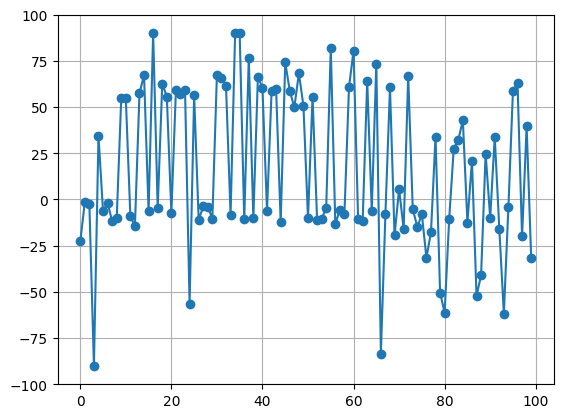

In [2341]:
def compensate_phase_diff(phase_diff): 
    for i in range(len(phase_diff)-1):
        while (phase_diff[i+1] - phase_diff[i] > np.pi):
        #if phase_diff[i+1] - phase_diff[i] > np.pi:
            phase_diff[i+1] = phase_diff[i+1] - 2*np.pi
            
        while (phase_diff[i+1] - phase_diff[i] < -np.pi):
        #if phase_diff[i+1] - phase_diff[i] < -np.pi:
            phase_diff[i+1] = phase_diff[i+1] + 2*np.pi

    return phase_diff

def cal_slope(phase_diff):
    x = np.arange(len(phase_diff)).reshape(-1, 1)
    y = phase_diff
    model = LinearRegression()
    model.fit(x, y)
    return model.coef_[0], model.intercept_

diff_list = []

angle_list = []
for i in range(100):

    packet1_phase_diff = np.arctan2(rx1_packet1_Q[i], rx1_packet1_I[i]) - np.arctan2(rx2_packet1_Q[i], rx2_packet1_I[i])
    packet2_phase_diff = np.arctan2(rx1_packet2_Q[i], rx1_packet2_I[i]) - np.arctan2(rx2_packet2_Q[i], rx2_packet2_I[i])

    packet1_phase_diff_copy = packet1_phase_diff.copy()
    packet2_phase_diff_copy = packet2_phase_diff.copy()

    # packet1_phase_diff_compensate = compensate_phase_diff(packet1_phase_diff)
    # packet2_phase_diff_compensate = compensate_phase_diff(packet2_phase_diff)

    packet1_phase_diff_unwrap = np.unwrap(packet1_phase_diff)
    packet2_phase_diff_unwrap = np.unwrap(packet2_phase_diff)

    packet1_slope, packet1_intercept = cal_slope(packet1_phase_diff_unwrap)
    packet2_slope, packet2_intercept = cal_slope(packet2_phase_diff_unwrap)

    # fig, axs = plt.subplots(2, 2)
    # axs[0, 0].plot(packet1_phase_diff)
    # axs[0, 1].plot(packet1_phase_diff_unwrap)
    # axs[1, 0].plot(packet2_phase_diff)
    # axs[1, 1].plot(packet2_phase_diff_unwrap)
    # plt.show()

    pkt1_geo_diff = 0
    drift_t1 = packet1_intercept - pkt1_geo_diff
    drift_delta_t = drift_t1 + interval[i]/16*packet1_slope

        
    # print(drift_delta_t)

    pkt2_geo_diff = np.mod(packet2_intercept - drift_delta_t, 2*np.pi)
    if pkt2_geo_diff > np.pi:
        pkt2_geo_diff = pkt2_geo_diff - 2*np.pi
    elif pkt2_geo_diff < -np.pi:
        pkt2_geo_diff = pkt2_geo_diff + 2*np.pi
    # print(pkt2_geo_diff)
    # print(np.arcsin(pkt2_geo_diff/(2*np.pi)*12.5/6)/np.pi*180)

    if pkt2_geo_diff/(2*np.pi)*12.5/6 > 1:
        angle = 90
    elif pkt2_geo_diff/(2*np.pi)*12.5/6 < -1:
        angle = -90
    else:
        angle = np.arcsin(pkt2_geo_diff/(2*np.pi)*12.5/6)/np.pi*180

    print(angle)
    angle_list.append(angle)

plt.plot(angle_list, marker='o')
# plt.boxplot(angle_list, showfliers=False)
plt.ylim(-100, 100)
plt.grid()
plt.show()

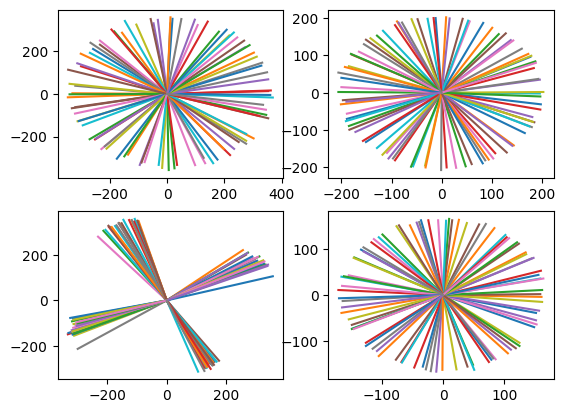

In [2342]:
pkt_id = 5

rx11_I = rx1_packet1_I[pkt_id]
rx11_Q = rx1_packet1_Q[pkt_id]

rx12_I = rx1_packet2_I[pkt_id]
rx12_Q = rx1_packet2_Q[pkt_id]

rx21_I = rx2_packet1_I[pkt_id]
rx21_Q = rx2_packet1_Q[pkt_id]

rx22_I = rx2_packet2_I[pkt_id]
rx22_Q = rx2_packet2_Q[pkt_id]



fig, axs = plt.subplots(2, 2)
for i in range(len(rx11_I)):
# for i in range(8):
    axs[0, 0].plot((0, rx11_I[i]), (0, rx11_Q[i]))
    axs[0, 1].plot((0, rx12_I[i]), (0, rx12_Q[i]))
    axs[1, 0].plot((0, rx21_I[i]), (0, rx21_Q[i]))
    axs[1, 1].plot((0, rx22_I[i]), (0, rx22_Q[i]))

plt.show()

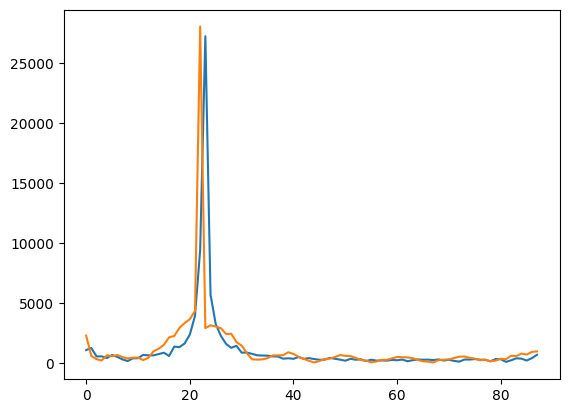

In [2343]:
rx11_signal = np.array(rx11_I) + 1j * np.array(rx11_Q)
rx21_signal = np.array(rx21_I) + 1j * np.array(rx21_Q)

fft_rx11_signal = np.fft.fft(rx11_signal)
fft_rx21_signal = np.fft.fft(rx21_signal)

plt.figure()
plt.plot(np.abs(fft_rx11_signal))
plt.plot(np.abs(fft_rx21_signal))
plt.show()

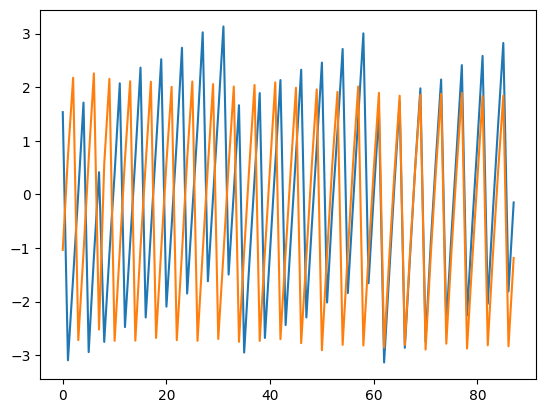

In [2344]:
rx11_angle = np.angle(rx11_signal)
rx21_angle = np.angle(rx21_signal)

plt.figure()
plt.plot(rx11_angle)
plt.plot(rx21_angle)
plt.show()

[2.5701795 2.4737124 2.552561  2.7554245 2.8008227 2.694213  2.843442
 2.9353313 2.9646435 3.0184975 3.1131306 3.122902  3.149763  3.2564125
 3.4036674 3.3519745 3.4105797 3.4804955 3.5771332 3.5369034 3.595005
 3.6731148 3.7348022 3.8210602 3.777275  3.863636  3.982479  4.102577
 4.1387596 4.1797256 4.21389   4.2549896 4.2530212 4.314434  4.413845
 4.4049187 4.462162  4.5231934 4.623783  4.6857033 4.7116585 4.760391
 4.834511  4.9242554 4.9646606 5.0401535 5.1006317 5.145729  5.144951
 5.212494  5.365967  5.372925  5.4503174 5.5426025 5.5211563 5.515373
 5.5124054 5.6990356 5.8240585 5.770958  5.81057   5.9262238 6.0065994
 5.98864   6.052231  6.174713  6.228714  6.1964417 6.291641  6.3997574
 6.427803  6.509392  6.509926  6.5505066 6.62722   6.6119614 6.6240616
 6.80381   6.898651  6.9348145 6.9575653 7.0318527 7.056381  7.090088
 7.1476746 7.264435  7.306381  7.3168335]


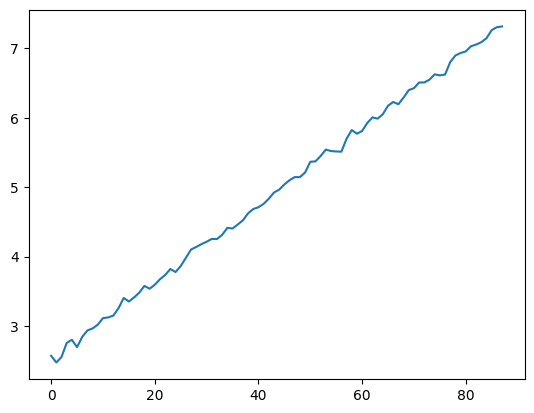

In [2345]:
rx11_unwrap = np.unwrap(rx11_angle)
rx21_unwrap = np.unwrap(rx21_angle)

print(rx11_unwrap - rx21_unwrap)

plt.figure()
plt.plot(np.unwrap(rx11_angle - rx21_angle))
plt.show()


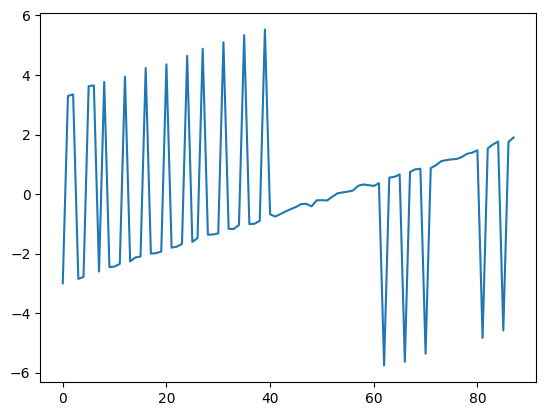

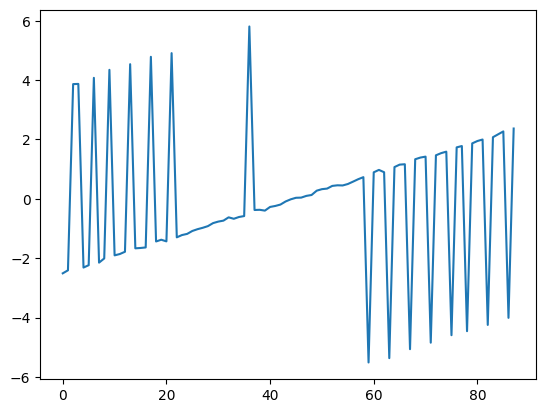

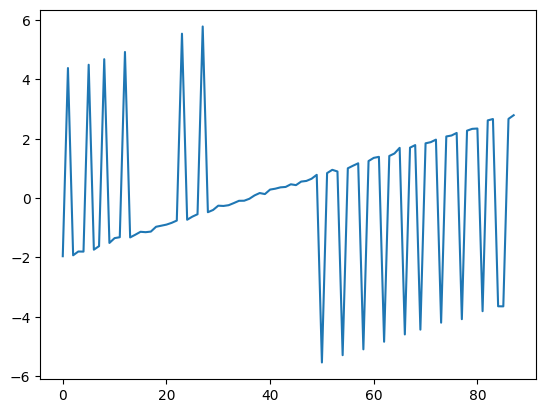

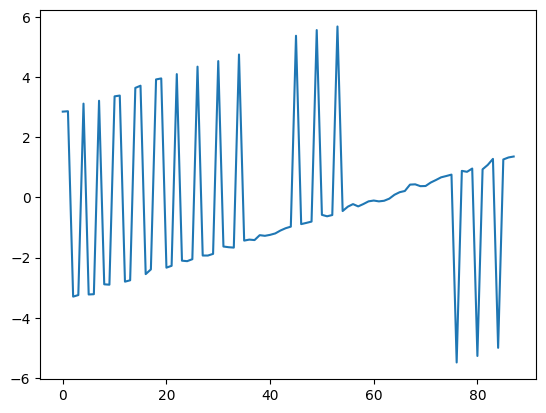

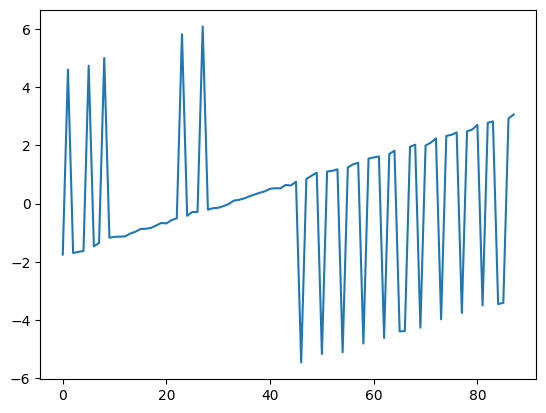

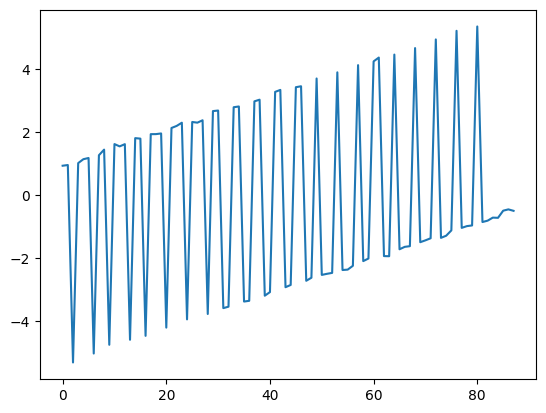

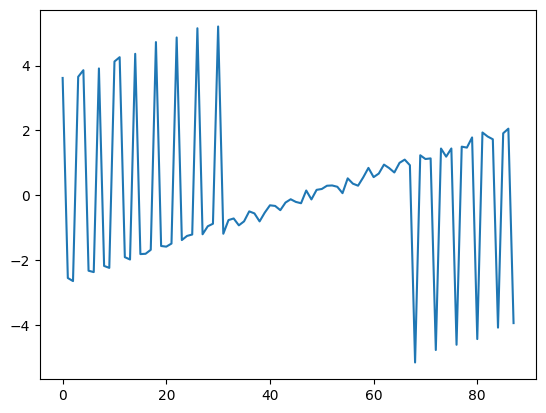

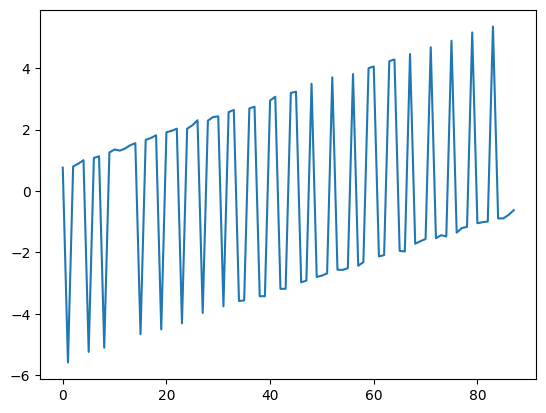

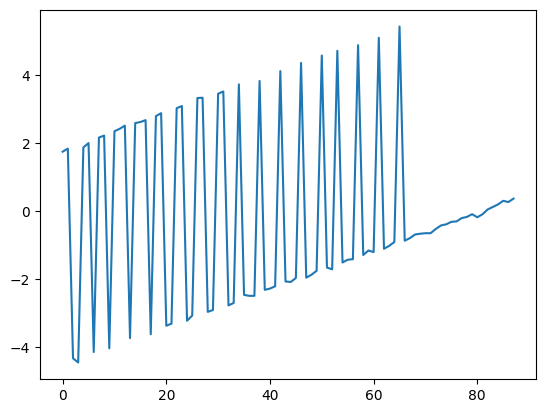

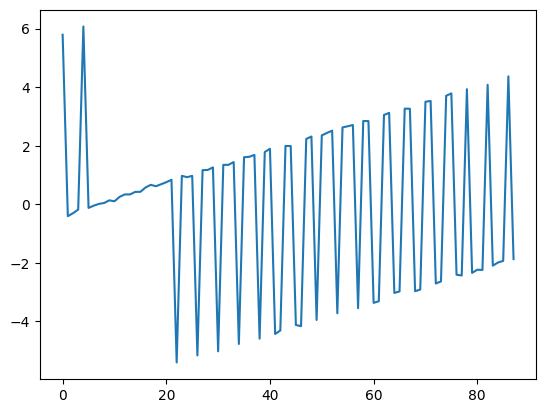

In [2346]:
plt.figure()
for id in range(10):
    rx11_I = rx1_packet1_I[id]
    rx11_Q = rx1_packet1_Q[id]

    rx12_I = rx1_packet2_I[id]
    rx12_Q = rx1_packet2_Q[id]

    rx21_I = rx2_packet1_I[id]
    rx21_Q = rx2_packet1_Q[id]

    rx22_I = rx2_packet2_I[id]
    rx22_Q = rx2_packet2_Q[id]

    # rx11_signal = np.array(rx11_I) + 1j * np.array(rx11_Q)
    # rx21_signal = np.array(rx21_I) + 1j * np.array(rx21_Q)
    rx12_signal = np.array(rx12_I) + 1j * np.array(rx12_Q)
    rx22_signal = np.array(rx22_I) + 1j * np.array(rx22_Q)
    rx12_angle = np.angle(rx12_signal)
    rx22_angle = np.angle(rx22_signal)

    plt.plot(rx12_angle - rx22_angle)
    plt.show()

# plt.show()

    

0.053489592
10537.0


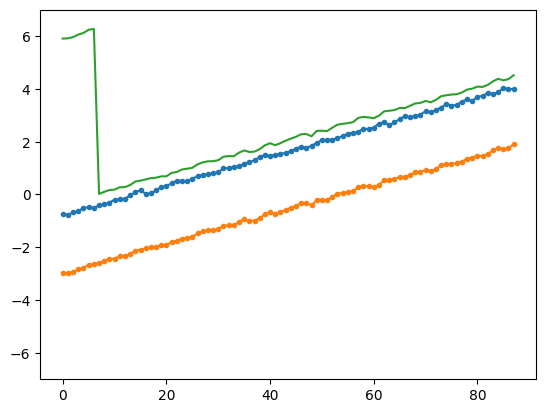

0.056987785
10518.0


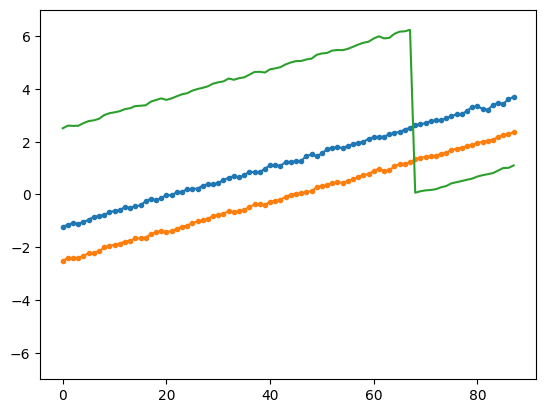

0.054969456
10574.0


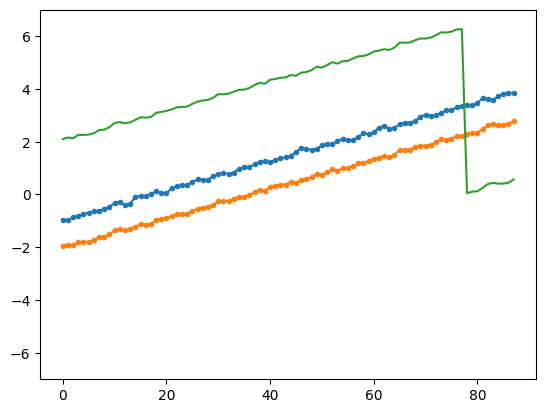

0.05799468
10556.0


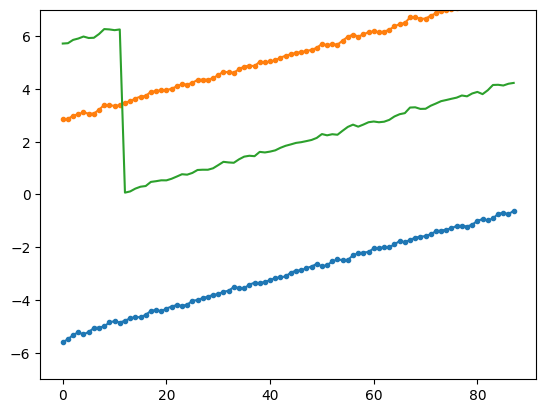

0.05657585
10537.0


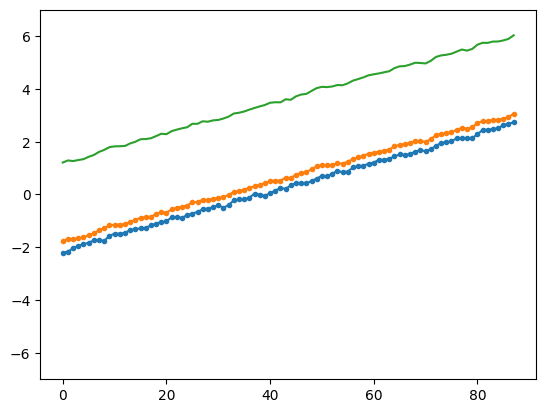

0.05345074
10517.0


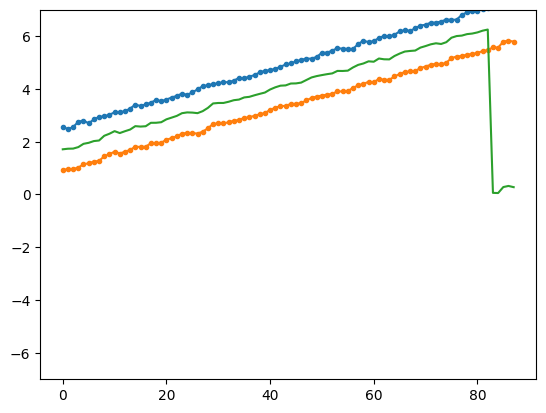

0.055038106
10575.0


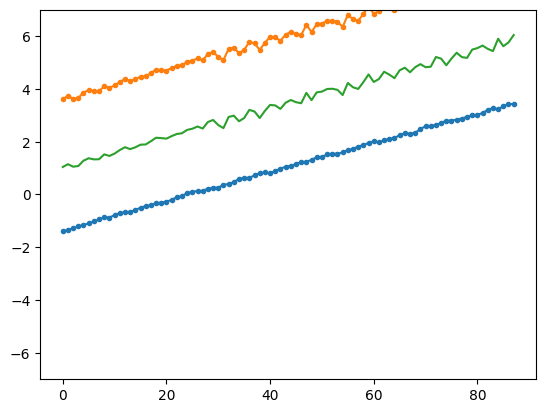

0.05801123
10557.0


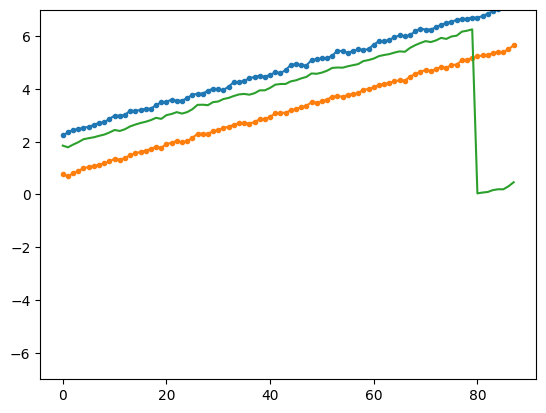

0.05584978
10537.0


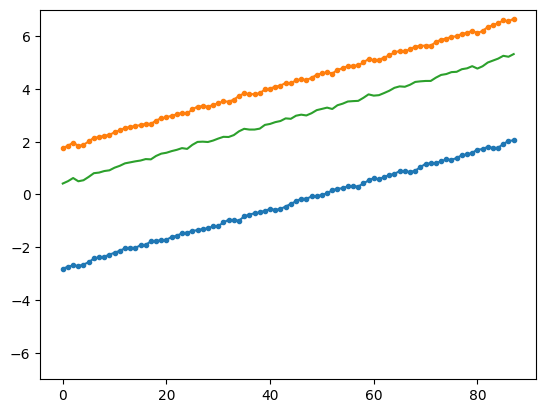

0.056995176
10517.0


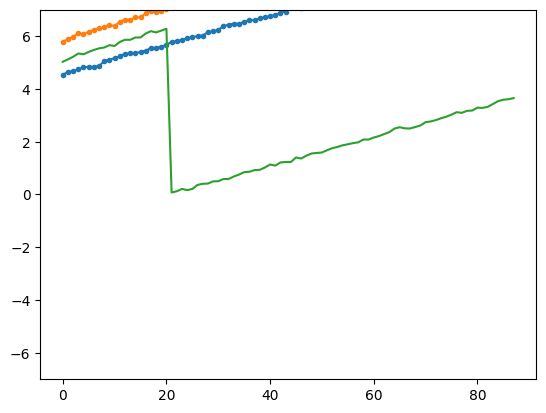

In [2347]:

id = 2
for id in range(0, 10):
    rx11_I = rx1_packet1_I[id]
    rx11_Q = rx1_packet1_Q[id]

    rx12_I = rx1_packet2_I[id]
    rx12_Q = rx1_packet2_Q[id]

    rx21_I = rx2_packet1_I[id]
    rx21_Q = rx2_packet1_Q[id]

    rx22_I = rx2_packet2_I[id]
    rx22_Q = rx2_packet2_Q[id]

    rx11_signal = np.array(rx11_I) + 1j * np.array(rx11_Q)
    rx21_signal = np.array(rx21_I) + 1j * np.array(rx21_Q)

    rx12_signal = np.array(rx12_I) + 1j * np.array(rx12_Q)
    rx22_signal = np.array(rx22_I) + 1j * np.array(rx22_Q)

    rx11_angle = np.angle(rx11_signal)
    rx21_angle = np.angle(rx21_signal)

    rx12_angle = np.angle(rx12_signal)
    rx22_angle = np.angle(rx22_signal)

    phase_diff1 = np.unwrap(rx11_angle - rx21_angle)
    phase_diff2 = np.unwrap(rx12_angle - rx22_angle)

    # plt.figure()
    # plt.plot(phase_diff1, marker='.')
    # plt.plot(phase_diff2, marker='.')
    # plt.show()



    mean_gradient = np.mean((np.gradient(phase_diff1)))
    print(mean_gradient)
    print(interval[id])
    compensate = np.mod(interval[id]*mean_gradient, 2*np.pi)
    compensate_phase_diff2 = np.mod(phase_diff2 - compensate - phase_diff1[0], 2*np.pi)

    plt.figure()
    plt.plot(phase_diff1, marker='.')
    plt.plot(phase_diff2, marker='.')
    plt.plot(compensate_phase_diff2)
    plt.ylim(-7, 7)
    plt.show()
    phase_diff2 - np.mod(phase_diff2, 2*np.pi)
    
    #plt.plot(np.unwrap(phase_diff1 - phase_diff2))
    #plt.plot(phase_diff2)
#

In [2348]:
def compensate_phase_diff(phase_diff): 
    for i in range(len(phase_diff)-1):
        while (phase_diff[i+1] - phase_diff[i] > np.pi):
        #if phase_diff[i+1] - phase_diff[i] > np.pi:
            phase_diff[i+1] = phase_diff[i+1] - 2*np.pi
            
        while (phase_diff[i+1] - phase_diff[i] < -np.pi):
        #if phase_diff[i+1] - phase_diff[i] < -np.pi:
            phase_diff[i+1] = phase_diff[i+1] + 2*np.pi


    return phase_diff

def cal_slope(phase_diff):
    x = np.arange(len(phase_diff)).reshape(-1, 1)
    y = phase_diff
    model = LinearRegression()
    model.fit(x, y)
    return model.coef_[0], model.intercept_

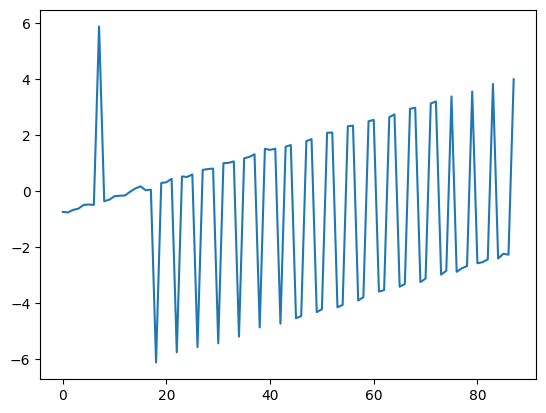

In [2349]:
# for i in range(10):
i = 0
packet1_phase_diff = np.arctan2(rx1_packet1_Q[i], rx1_packet1_I[i]) - np.arctan2(rx2_packet1_Q[i], rx2_packet1_I[i])

plt.figure()
plt.plot(packet1_phase_diff)
plt.show()

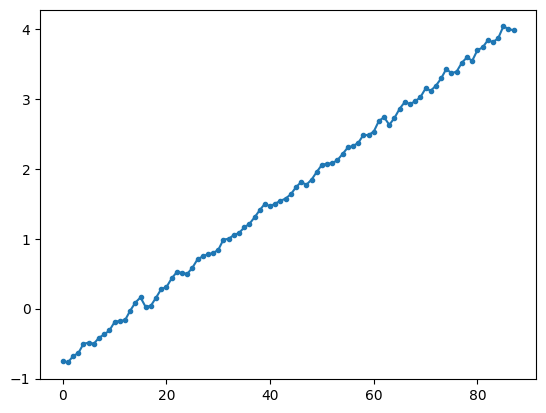

In [2350]:
packet1_phase_diff_compensate = compensate_phase_diff(packet1_phase_diff)

plt.figure()
plt.plot(packet1_phase_diff_compensate, marker='.')
plt.show()

In [2351]:
slope, drift = cal_slope(packet1_phase_diff_compensate)
print(slope, drift)

drift_dot = drift + interval[0] * slope

0.055702064413334425 -0.7841363749576229


In [2352]:
import numpy as np

def rotate_iq(I, Q, theta):
    """
    将IQ样本逆时针旋转theta角度
    
    参数:
    I: I分量 (实数部分)
    Q: Q分量 (虚数部分)
    theta: 旋转角度 (弧度)
    
    返回:
    I_rotated: 旋转后的I分量
    Q_rotated: 旋转后的Q分量
    """
    # 构建旋转矩阵
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                               [np.sin(theta), np.cos(theta)]])
    
    # 将IQ数据组合成2D数组
    iq_data = np.column_stack((I, Q))
    
    # 应用旋转矩阵
    rotated_iq = np.dot(iq_data, rotation_matrix.T)
    
    # 分离旋转后的I和Q分量
    I_rotated = rotated_iq[:, 0]
    Q_rotated = rotated_iq[:, 1]
    
    return I_rotated, Q_rotated

(88,)
[ -95.24841397  122.89735029   81.45869396 -133.59256825  -67.17628281
  139.93995824   58.45182941 -148.01896659  137.75884489   59.67635791
 -143.14965003  -41.49561377  148.82279754   25.76392663 -153.40977173
  -34.4739813   149.31548868   17.75691187 -149.89457213    8.66999323
  156.93060332   -8.19170081 -151.16229679   22.98120182  154.80708485
  -22.99560054 -148.77083466   37.56035406  149.30672196  -46.52395366
 -145.70513006   55.75549692  143.31366793  -75.45751064 -138.02365382
   74.71127457  127.14688452  -93.1887598  -123.78443883   93.66705222
  116.030969   -107.30401833 -103.95846864  121.16573193  101.79175401
 -120.67304078 -109.53082512  113.4122621    79.0384344  -129.7230327
  -71.5385095   137.04140625   74.21231399 -134.38200048  -52.65472544
  146.3449431    48.78518989 -142.65695889  -42.72014227  149.04754503
   17.26422073 -154.42395145  -25.5103817   150.5544159    11.94540918
 -155.93082232   10.8655053   157.70563683  -11.83648887 -152.14767907
 

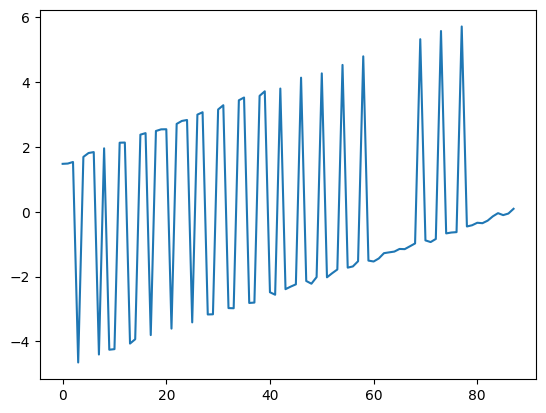

In [2353]:
print(rx2_packet2_I[0].shape)

rx2I, rx2Q = rotate_iq(rx2_packet2_I[0], rx2_packet2_Q[0], drift_dot)
print(rx2I)
print(np.arctan2(rx2Q, rx2I).shape)
delta_phi = np.arctan2(rx1_packet2_Q[i], rx1_packet2_I[i]) - np.arctan2(rx2Q, rx2I)

plt.figure()
plt.plot(delta_phi)
plt.show()

In [2354]:
delta_phi = compensate_phase_diff(delta_phi)
slope_dot, phi = cal_slope(delta_phi)

print(slope_dot, slope)
print(phi)

x1 = phi/6.28*12.5/6
print('angle1:', np.arccos(x1)/np.pi*180)

0.055388362243273294 0.055702064413334425
1.5069332355747043
angle1: 60.00585472125398


In [2355]:

for i in range(10):
    packet1_phase_diff = np.arctan2(rx1_packet1_Q[i], rx1_packet1_I[i]) - np.arctan2(rx2_packet1_Q[i], rx2_packet1_I[i])
    packet1_phase_diff_compensate = compensate_phase_diff(packet1_phase_diff)
    slope, drift = cal_slope(packet1_phase_diff_compensate)

    drift_dot = np.mod(drift + interval[i] * slope, 2*np.pi)

    rx2I, rx2Q = rotate_iq(rx2_packet2_I[i], rx2_packet2_Q[i], drift_dot)

    delta_phi = np.arctan2(rx1_packet2_Q[i], rx1_packet2_I[i]) - np.arctan2(rx2Q, rx2I)

    delta_phi = compensate_phase_diff(delta_phi)
    slope_dot, phi = cal_slope(delta_phi)

    x1 = phi/6.28*12.5/6
    print('angle1:', np.arccos(x1)/np.pi*180)

angle1: 60.00585472125443
angle1: 102.93637488374074
angle1: 76.33219019295427
angle1: 51.030671354776025
angle1: 3.701037771753546
angle1: 103.15643661916693
angle1: 103.37275484743174
angle1: 60.382904760116595
angle1: 127.17078108327993
angle1: 76.21825930696544


-0.05570206402868124 0.7841363471340039
angle1: 90.21982372589802
-0.05549707619484425 1.1933496585477281
angle1: 107.11808000349608
-0.05569050599454857 0.9551109778766149
angle1: 121.61249583159541
-0.055365677246294646 -0.8497905322827166
angle1: 32.74068390870267
-0.055204726811192165 2.109664567046897
angle1: 127.14057037456591
-0.05547683696278906 -2.5207314165546904
angle1: 63.46367817349097
-0.05519820777212874 1.3451880023180212
angle1: 117.68467097000573
-0.05565371115652496 -2.347487262856364
angle1: 133.21385629737028
-0.055466510337037006 2.786326037933887
angle1: 103.08411181268498
-0.05561954635819848 1.7055787756940133
angle1: 71.81165905983516
-0.05533614016835515 -2.0164613208074256
angle1: 136.5746887593079
-0.055366152784485666 2.0066332971758984
angle1: 136.52409455623075
-0.055766672982168454 -0.3268614348644383
angle1: 94.61751379699574
-0.055542366070131154 -1.3708455603687706
angle1: 37.670976318712924
-0.05519547997915304 -0.1324246613246003
angle1: 125.260169

C:\Users\11422\AppData\Local\Temp\ipykernel_73964\3254224260.py:33: RuntimeWarning: invalid value encountered in arccos
  angle_list.append(np.arccos(x1)/np.pi*180)
C:\Users\11422\AppData\Local\Temp\ipykernel_73964\3254224260.py:34: RuntimeWarning: invalid value encountered in arccos
  print('angle1:', np.arccos(x1)/np.pi*180)
C:\Users\11422\AppData\Local\Temp\ipykernel_73964\3254224260.py:33: RuntimeWarning: invalid value encountered in arccos
  angle_list.append(np.arccos(x1)/np.pi*180)
C:\Users\11422\AppData\Local\Temp\ipykernel_73964\3254224260.py:34: RuntimeWarning: invalid value encountered in arccos
  print('angle1:', np.arccos(x1)/np.pi*180)


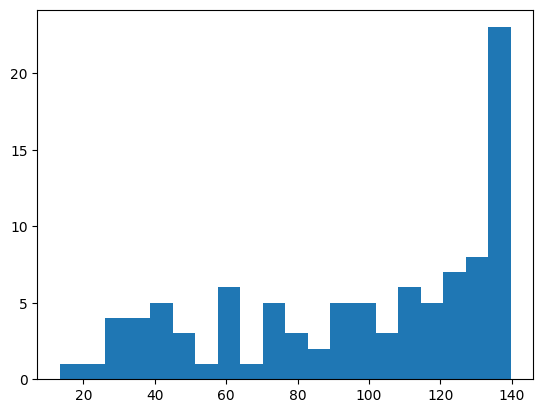

nan


In [2357]:
def iq_angle_between_array(I1_arr, Q1_arr, I2_arr, Q2_arr):
    """
    计算多对IQ样本之间的角度
    """
    # 计算点积和叉积
    dot_product = I1_arr * I2_arr + Q1_arr * Q2_arr
    cross_product = I1_arr * Q2_arr - Q1_arr * I2_arr
    
    # 计算角度
    angles = np.arctan2(cross_product, dot_product)
    
    return angles

angle_list = []
for i in range(100):
    angles = iq_angle_between_array(rx1_packet1_I[i], rx1_packet1_Q[i], rx2_packet1_I[i], rx2_packet1_Q[i])
    angles = compensate_phase_diff(angles)
    # plt.figure()
    # plt.plot(angles)
    # plt.show()
    slope, intercept = cal_slope(angles)
    print(slope, intercept)

    drift_dot = np.mod(intercept + interval2[i] * slope, 2*np.pi)

    rx2I, rx2Q = rotate_iq(rx2_packet2_I[i], rx2_packet2_Q[i], drift_dot)

    phi = iq_angle_between_array(rx1_packet2_I[i], rx1_packet2_Q[i], rx2I, rx2Q)

    slope_dot, intercept_dot = cal_slope(phi)

    x1 = intercept_dot/6.28*12.5/6
    angle_list.append(np.arccos(x1)/np.pi*180)
    print('angle1:', np.arccos(x1)/np.pi*180)

plt.figure()
plt.hist(angle_list,bins=20)
plt.show()

print(np.mean(angle_list))